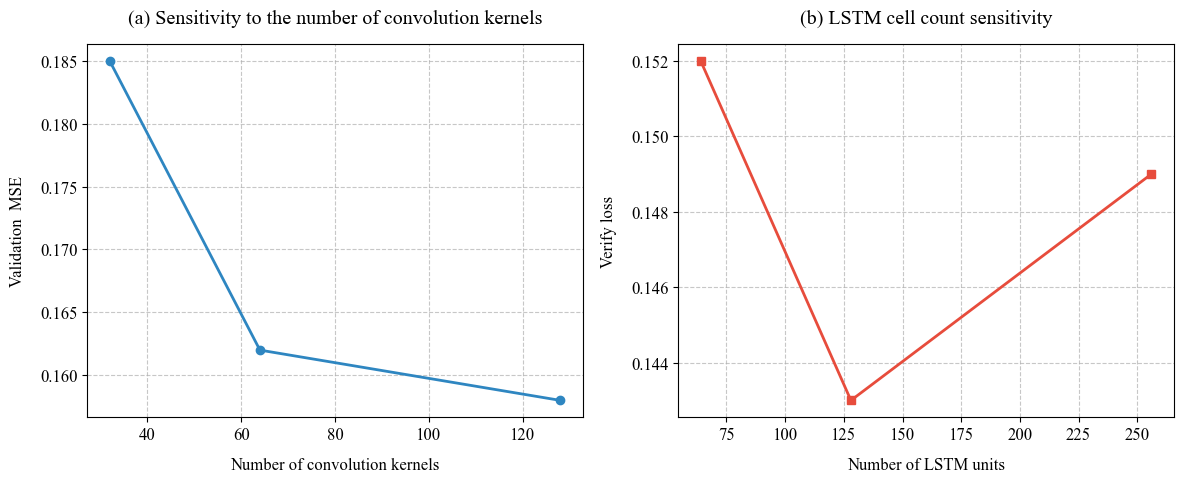

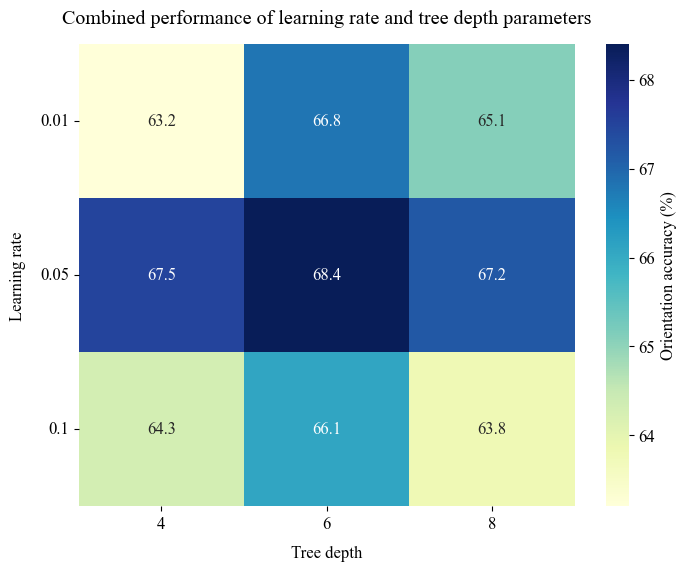

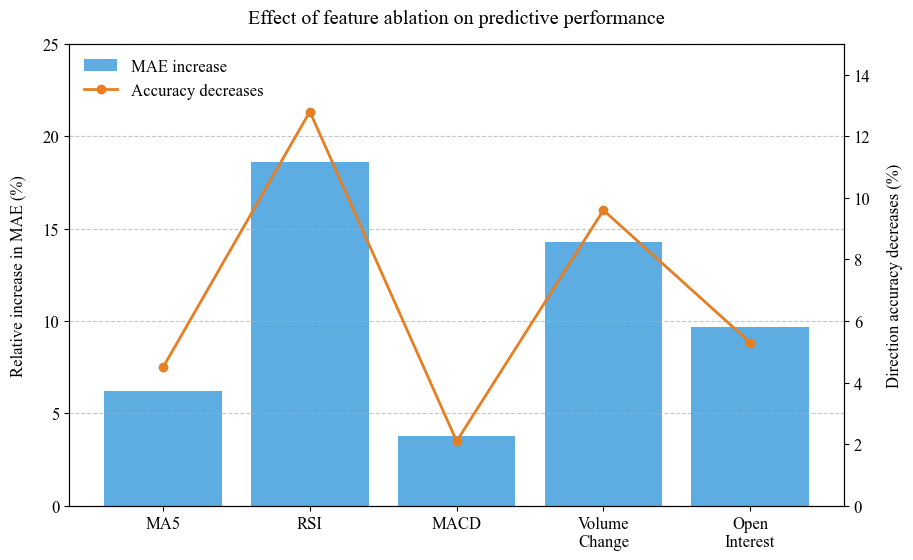

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'  # 设置学术字体
plt.rcParams['font.size'] = 12

# ==========================
# 图1：CNN-LSTM超参数敏感性分析
# ==========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 模拟数据
conv_kernels = [32, 64, 128]
lstm_units = [64, 128, 256]
mse_values = [0.185, 0.162, 0.158]
val_loss = [0.152, 0.143, 0.149]

# 左图：卷积核数量对MSE的影响
ax1.plot(conv_kernels, mse_values, marker='o', color='#2E86C1', linewidth=2)
ax1.set_title('(a) Sensitivity to the number of convolution kernels', pad=15)
ax1.set_xlabel('Number of convolution kernels', labelpad=10)
ax1.set_ylabel('Validation  MSE', labelpad=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# 右图：LSTM单元数对验证损失的影响
ax2.plot(lstm_units, val_loss, marker='s', color='#E74C3C', linewidth=2)
ax2.set_title('(b) LSTM cell count sensitivity', pad=15)
ax2.set_xlabel('Number of LSTM units', labelpad=10)
ax2.set_ylabel('Verify loss', labelpad=10)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('cnn_lstm_sensitivity.png', dpi=300, bbox_inches='tight')

# ==========================
# 图2：XGBoost参数热力图  
# ==========================
plt.figure(figsize=(8, 6))

# 模拟参数网格数据
learning_rates = [0.01, 0.05, 0.1]
max_depths = [4, 6, 8]
accuracy_grid = np.array([
    [63.2, 66.8, 65.1],
    [67.5, 68.4, 67.2],
    [64.3, 66.1, 63.8]
])

# 绘制热力图
sns.heatmap(accuracy_grid, annot=True, fmt=".1f", cmap="YlGnBu",
            xticklabels=max_depths, yticklabels=learning_rates,
            cbar_kws={'label': 'Orientation accuracy (%)'})

plt.title('Combined performance of learning rate and tree depth parameters', pad=15)
plt.xlabel('Tree depth', labelpad=10)
plt.ylabel('Learning rate', labelpad=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.savefig('xgboost_heatmap.png', dpi=300, bbox_inches='tight')

# ==========================
# 图3：特征消融分析
# ==========================
features = ['MA5', 'RSI', 'MACD', 'Volume\nChange', 'Open\nInterest']
mae_increase = [6.2, 18.6, 3.8, 14.3, 9.7]
acc_drop = [4.5, 12.8, 2.1, 9.6, 5.3]

fig, ax1 = plt.subplots(figsize=(10, 6))

# 柱状图（MAE增加）
bars = ax1.bar(features, mae_increase, color='#3498DB', alpha=0.8)
ax1.set_ylabel('Relative increase in MAE (%)', labelpad=12)
ax1.set_ylim(0, 25)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 折线图（准确性下降）
ax2 = ax1.twinx()
line = ax2.plot(features, acc_drop, color='#E67E22', marker='o', linewidth=2)
ax2.set_ylabel('Direction accuracy decreases (%)', labelpad=12)
ax2.set_ylim(0, 15)

# 组合图例
ax1.legend([bars, line[0]], ['MAE increase', 'Accuracy decreases'], 
           loc='upper left', frameon=False)

plt.title('Effect of feature ablation on predictive performance', pad=15)
plt.savefig('feature_ablation.png', dpi=300, bbox_inches='tight')

plt.show()